<IPython.core.display.Javascript object>


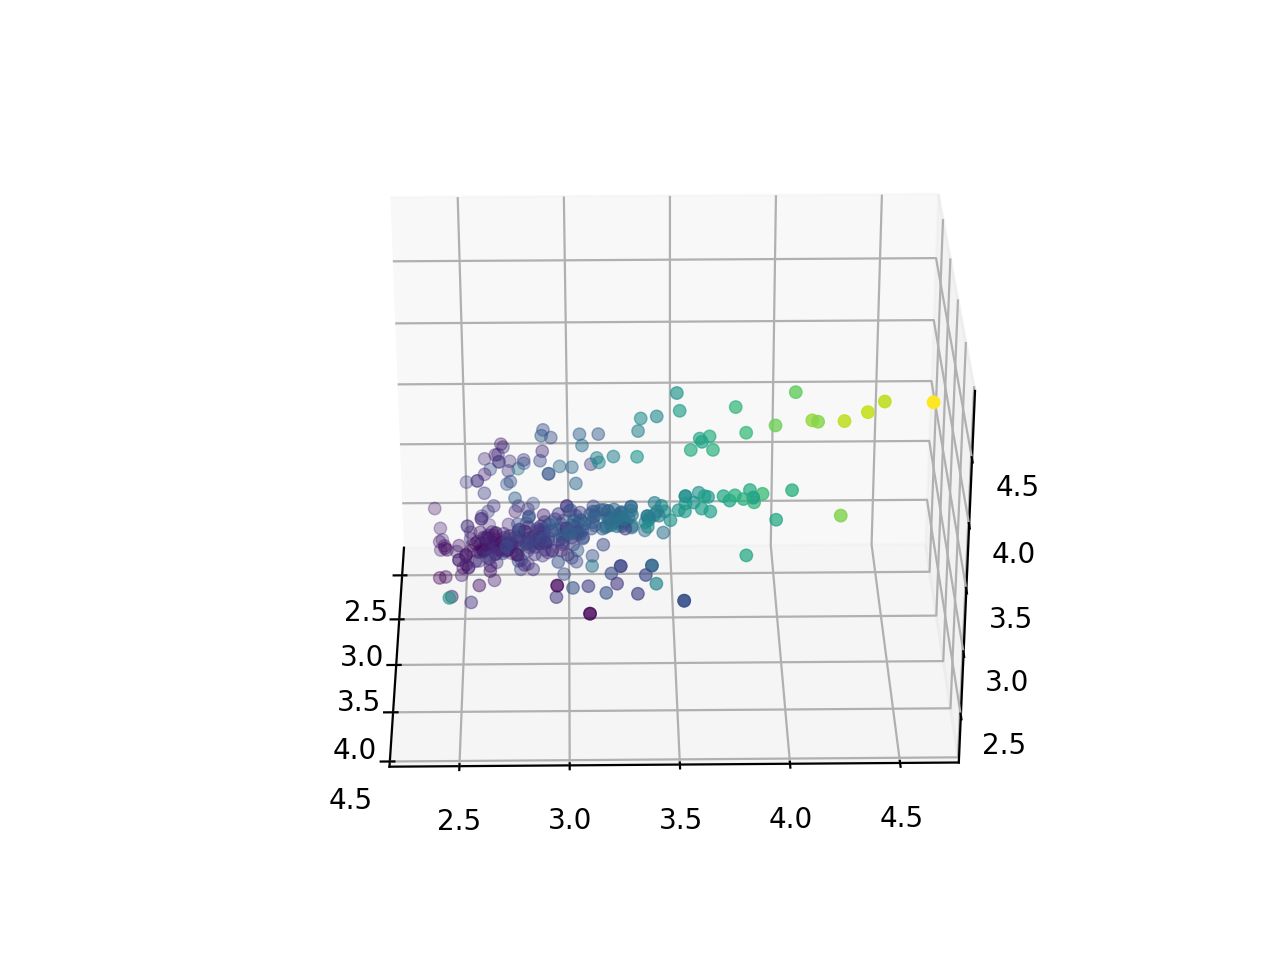

In [2]:
%matplotlib notebook
import pandas as pd, numpy as np, random
import matplotlib.pyplot as plt, matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# Read csv into data frame. 
df = pd.read_csv('data/DC10_green-deduped_data.csv')

# Keep only relevant columns in the data frame.
df = df[['meanTPM_T0','meanTPM_T1','meanTPM_T2','meanTPM_T3']]

# Remove rows that have missing values and/or infinite values. 
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Convert everying to doubles. 
df = df.astype('double')

# Most of the data points are less than 200. I am only plotting ones larger than 200 to make the code run faster.
x = df['meanTPM_T0'].where(df['meanTPM_T0'] > 200)
y = df['meanTPM_T1'].where(df['meanTPM_T1'] > 200)
z = df['meanTPM_T2'].where(df['meanTPM_T2'] > 200)
r = df['meanTPM_T3'].where(df['meanTPM_T3'] > 200)

# Supress massive values by taking log. 
# Values may be massive becuase of large expression levels or misreads. 
x = np.log10(x)
y = np.log10(y)
z = np.log10(z)
r = np.log10(r)

# Plot the result. 
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=r, cmap='viridis', linewidth=0.5);
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)